#  <center>Short-term Plasticity Implementation with BrainPy</center>
   <center>王宇哲 1800011828</center>
   <center>College of Chemistry and Molecular Engineering, Peking University</center>

In [70]:
import brainpy as bp
import brainpy.math as bm
import brainmodels
import matplotlib.pyplot as plt
%matplotlib inline

$$ \frac{du}{dt}  =  -\frac{u}{\tau_f}+U(1-u^-)\delta(t-t_{sp})$$
$$\frac{dx}{dt}  =  \frac{1-x}{\tau_d}-u^+x^-\delta(t-t_{sp})$$
$$\frac{dI}{dt}  =  -\frac{I}{\tau_s} + Au^+x^-\delta(t-t_{sp})$$

$$\Delta I(t_{spike}) = Au^+x^-$$

In [71]:
def STP_run_and_plot(U, tau_d, tau_f, name):
    neu1 = brainmodels.neurons.LIF(1)
    neu2 = brainmodels.neurons.LIF(1)
    syn1 = brainmodels.synapses.STP(neu1, neu2, bp.connect.All2All(), U=U, tau_d=tau_d, tau_f=tau_f)
    net = bp.Network(pre=neu1, syn=syn1, post=neu2)
    
    # run
    runner = bp.StructRunner(net, inputs=[('pre.input', 28.)], monitors=['syn.I', 'syn.u', 'syn.x'])
    runner.run(150.)
    
    # plot
    fig, gs = bp.visualize.get_figure(2, 1, 3, 7)

    fig.add_subplot(gs[0, 0])
    plt.plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label='u')
    plt.plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label='x')
    plt.legend()

    fig.add_subplot(gs[1, 0])
    plt.plot(runner.mon.ts, runner.mon['syn.I'][:, 0], label='I')
    plt.legend()

    plt.xlabel('Time (ms)')
    plt.savefig(name, dpi=1000, bbox_inches='tight')
    plt.show()
    

### STD

  0%|          | 0/1500 [00:00<?, ?it/s]

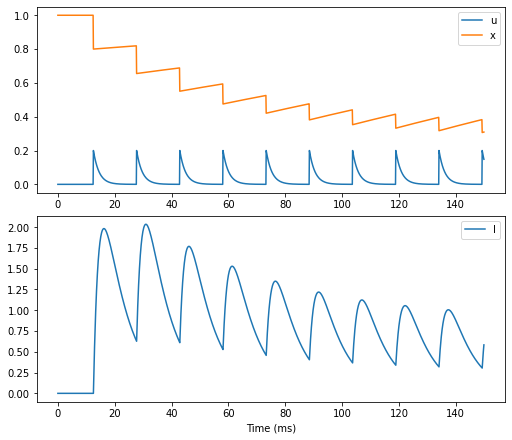

In [72]:
STP_run_and_plot(U=0.2, tau_d=150., tau_f=2., name='STD.jpg')

### STF

  0%|          | 0/1500 [00:00<?, ?it/s]

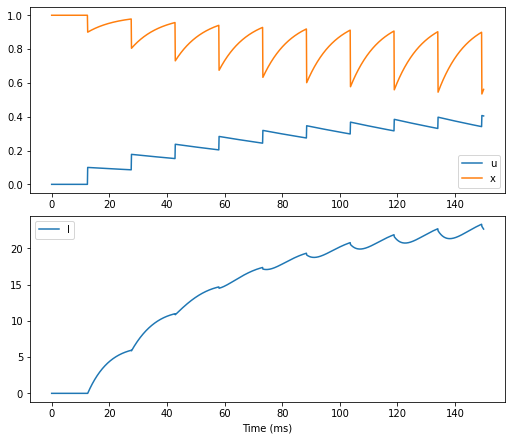

In [73]:
STP_run_and_plot(U=0.1, tau_d=10, tau_f=100., name='STF.jpg')

### Discussion

#### $U$

  0%|          | 0/1500 [00:00<?, ?it/s]

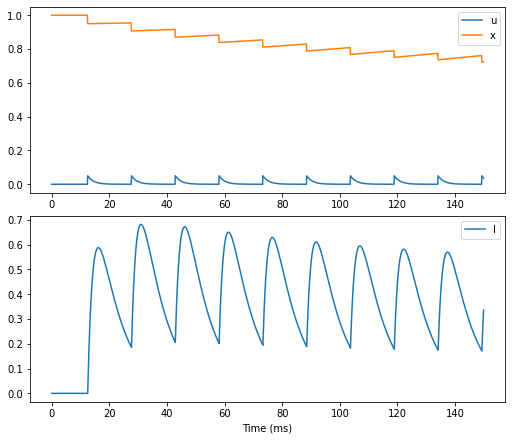

In [81]:
STP_run_and_plot(U=0.05, tau_d=150., tau_f=2., name='U1.jpg')

  0%|          | 0/1500 [00:00<?, ?it/s]

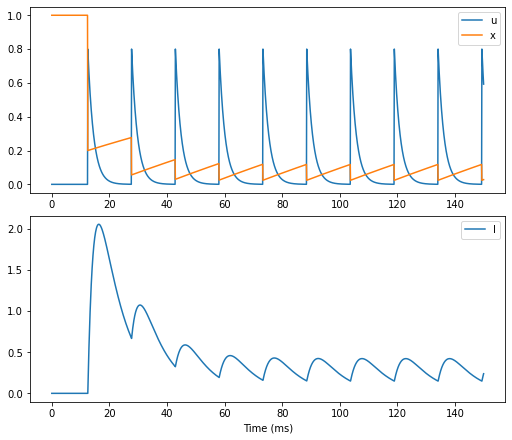

In [80]:
STP_run_and_plot(U=0.8, tau_d=150., tau_f=2., name='U2.jpg')

#### $\tau_d$

  0%|          | 0/1500 [00:00<?, ?it/s]

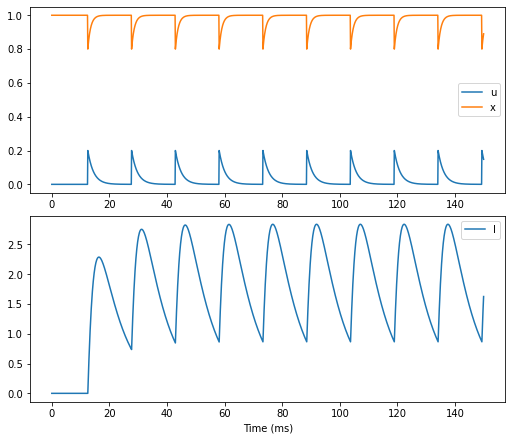

In [95]:
STP_run_and_plot(U=0.2, tau_d=1., tau_f=2., name='tau_d1.jpg')

  0%|          | 0/1500 [00:00<?, ?it/s]

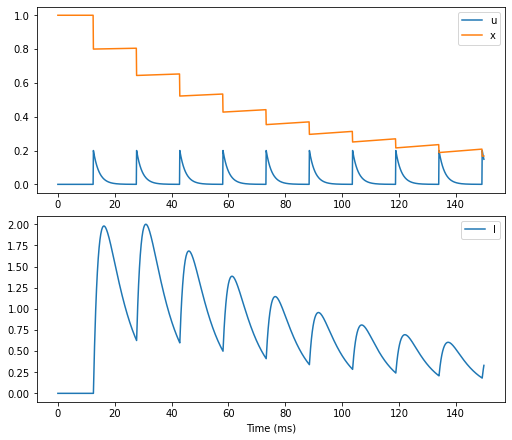

In [84]:
STP_run_and_plot(U=0.2, tau_d=600., tau_f=2., name='tau_d2.jpg')

#### $\tau_f$

  0%|          | 0/1500 [00:00<?, ?it/s]

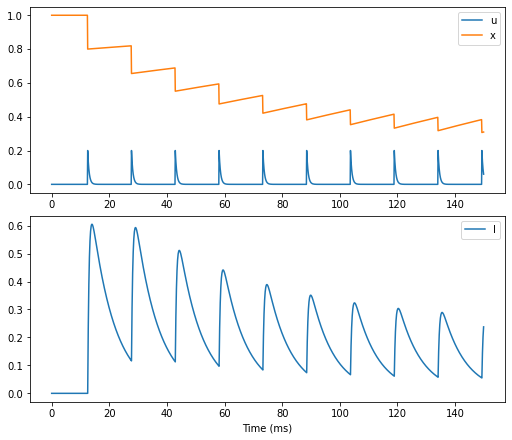

In [85]:
STP_run_and_plot(U=0.2, tau_d=150., tau_f=0.5, name='tau_f1.jpg')

  0%|          | 0/1500 [00:00<?, ?it/s]

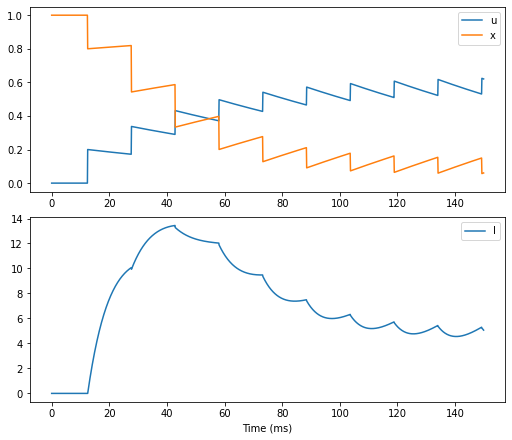

In [94]:
STP_run_and_plot(U=0.2, tau_d=150., tau_f=100., name='tau_f2.jpg')